In [1]:
from fit_model import *
from scipy.optimize import minimize
import numdifftools as nd

In [2]:
basedir = common.getBaseDirectory()
#common.symlink(basedir+"data/templatesCounting",basedir+"data/templates")

X = np.load(basedir + "data/templates/templatesX_{}.npy".format('')) 
#Y = np.load(basedir + "data/templates/templatesY_{}.npy".format('')) 
Y = np.sum(X,axis=1)

# define Model

In [3]:
model = PredictiveModel_np(X,controlTauID=True)

In [4]:
def loss (param):
    y, regu = model.predict(param)
    loss  = np.sum( (y-Y)**2/(2*Y) )
    #loss = np.sum(-Y*np.log(y)+y )
    loss += regu
    return loss

param0 = np.array([0.107,0.108,0.1081] + [0.01]*22)
result = minimize( loss, param0, method='SLSQP', bounds = [(0,1)]*3 + [(-1,1)]*22 )
print(result.x[:3])

[0.10799894 0.10799889 0.10800044]


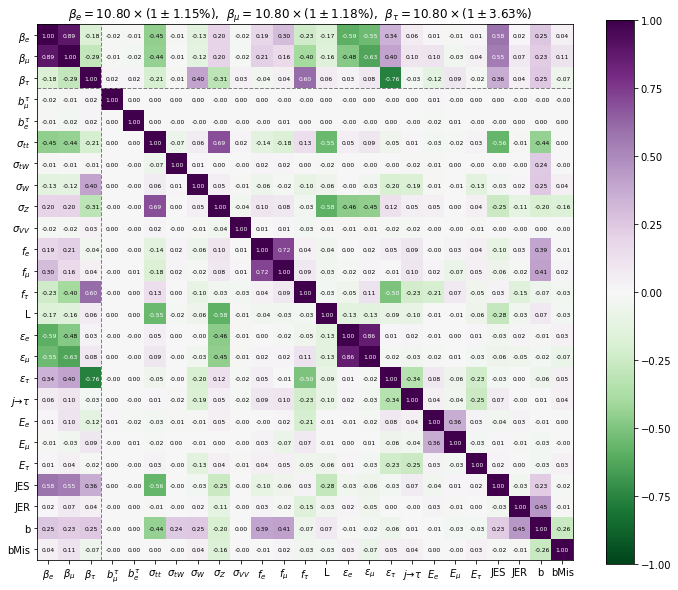

In [5]:
hcalc = nd.Hessian(loss, step=1e-4, method='central')
hess  = hcalc( result.x )
hessinv = np.linalg.inv(hess)
sig   = np.sqrt(hessinv.diagonal())
cor  = hessinv/np.outer(sig, sig)

commonp.showParameterCovMat(cor,sig)

In [6]:
for i in range(sig.size):
    c,s = result.x[i], sig[i]
    print('{:7.4f} +/- {:6.4f}'.format(c,s))

 0.1080 +/- 0.0012
 0.1080 +/- 0.0013
 0.1080 +/- 0.0039
-0.0000 +/- 0.9999
-0.0000 +/- 0.9998
 0.0002 +/- 0.5451
-0.0000 +/- 0.9966
-0.0000 +/- 0.9192
-0.0001 +/- 0.5231
 0.0000 +/- 0.9991
-0.0001 +/- 0.8009
-0.0001 +/- 0.5551
 0.0001 +/- 0.2794
 0.0002 +/- 0.8430
 0.0003 +/- 0.7042
 0.0003 +/- 0.6949
-0.0002 +/- 0.8500
 0.0000 +/- 0.8262
-0.0001 +/- 0.6709
-0.0001 +/- 0.9449
-0.0001 +/- 0.9273
-0.0005 +/- 0.8311
-0.0001 +/- 0.9848
-0.0000 +/- 0.0827
-0.0001 +/- 0.9850


In [9]:
print(sig[0:3]/0.1080*100)
print(1/sig[3:])

[1.15919384 1.16025832 4.29652869]
[ 1.00006729  1.00018663  1.94060819  1.00329411  1.1448721   1.93933486
  1.00163197  1.24776451  1.81152545  1.08891059  1.1787634   1.38555539
  1.38919686  1.21125199  1.25302669  1.51213028  1.06077459  1.07492117
  1.19382967  1.02783641 12.40975849  1.01605556]


(0, 19)

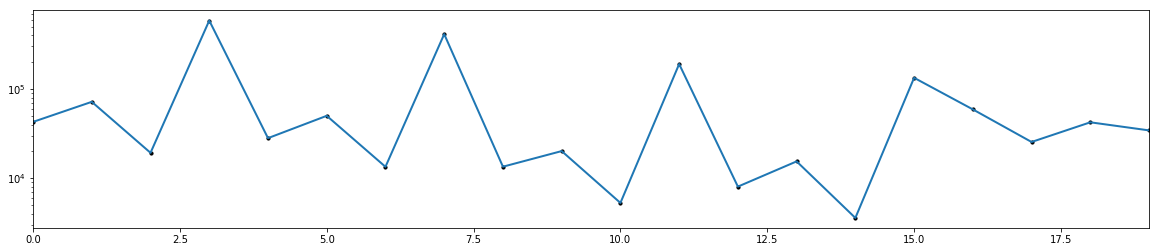

In [10]:
#temp = np.transpose(X,(0,1,2))
temp = np.concatenate(X,axis=1)
temp = np.sum(temp,axis=0)

targ = np.concatenate(Y,axis=0)

plt.figure(figsize=(20,4),facecolor='w')
c = np.arange(temp.size)
plt.plot(c, temp, lw=2)
plt.scatter(c, targ, c='k',s=10)
plt.yscale('log')
plt.xlim(c.min(),c.max())